## INSTALACIÓN E IMPORTACIÓN DE LIBRERÍAS

In [1]:
# Evitamos que se generen Warnings en los outputs

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn

In [3]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin/"
import graphviz

In [4]:
plt.style.use('ggplot')

In [5]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

## IMPORTACIÓN DE DATOS

In [6]:
dfDemographic = pd.read_csv('/Users/noecrespo/Documents/Nuclio - Data Science & IA/TFM/easyMoney/dfDemographic.csv', index_col = None)
print(dfDemographic)

          pk_cid pk_partition country_id region_code gender  age deceased  \
0        1375586   2018-01-01         ES        29.0      H   35        N   
1        1050611   2018-01-01         ES        13.0      V   23        N   
2        1050612   2018-01-01         ES        13.0      V   23        N   
3        1050613   2018-01-01         ES        50.0      H   22        N   
4        1050614   2018-01-01         ES        50.0      V   23        N   
...          ...          ...        ...         ...    ...  ...      ...   
5962919  1166765   2019-05-01         ES        50.0      V   22        N   
5962920  1166764   2019-05-01         ES        26.0      V   23        N   
5962921  1166763   2019-05-01         ES        50.0      H   47        N   
5962922  1166789   2019-05-01         ES        50.0      H   22        N   
5962923  1550586   2019-05-01         ES        28.0      H   37        N   

            salary  
0         87218.10  
1         35548.74  
2        122

In [7]:
dfSales = pd.read_csv('/Users/noecrespo/Documents/Nuclio - Data Science & IA/TFM/easyMoney/dfSales.csv', index_col = None)
print(dfSales)

        pk_sale      cid  month_sale  product_ID  net_margin
0          6666    33620  2018-05-01        2335       952.9
1          6667    35063  2018-06-01        2335      1625.2
2          6668    37299  2018-02-01        2335      1279.7
3          6669    39997  2018-02-01        2335      1511.9
4          6670    44012  2018-02-01        2335      1680.3
...         ...      ...         ...         ...         ...
240768   247434  1553456  2019-05-01        4657        56.7
240769   247435  1553541  2019-05-01        4657        66.5
240770   247436  1553559  2019-05-01        4657        73.0
240771   247437  1553565  2019-05-01        4657        82.3
240772   247438  1553571  2019-05-01        4657        84.4

[240773 rows x 5 columns]


In [8]:
dfproduct_description = pd.read_csv('/Users/noecrespo/Documents/Nuclio - Data Science & IA/TFM/easyMoney/dfproduct_description.csv', index_col = None)
print(dfproduct_description)

    pk_product_ID        product_desc family_product
0            4657           em_acount        account
1            3819          debit_card   payment_card
2            1364        pension_plan   pension_plan
3            2234             payroll        account
4            2235     payroll_account        account
5            8871         emc_account        account
6            2312         credit_card   payment_card
7            2335  short_term_deposit     investment
8            2336   long_term_deposit     investment
9            2673          securities     investment
10           1119               funds     investment
11           9001               loans           loan
12           4033            mortgage           loan


In [9]:
dfCustomer_product = pd.read_csv('/Users/noecrespo/Documents/Nuclio - Data Science & IA/TFM/easyMoney/dfCustomer_product.csv', index_col = None)
print(dfCustomer_product)

          pk_cid pk_partition  short_term_deposit  loans  mortgage  funds  \
0        1375586   2018-01-01                   0      0         0      0   
1        1050611   2018-01-01                   0      0         0      0   
2        1050612   2018-01-01                   0      0         0      0   
3        1050613   2018-01-01                   1      0         0      0   
4        1050614   2018-01-01                   0      0         0      0   
...          ...          ...                 ...    ...       ...    ...   
5962858  1166765   2019-05-01                   0      0         0      0   
5962859  1166764   2019-05-01                   0      0         0      0   
5962860  1166763   2019-05-01                   0      0         0      0   
5962861  1166789   2019-05-01                   0      0         0      0   
5962862  1550586   2019-05-01                   0      0         0      0   

         securities  long_term_deposit  em_account_pp  credit_card  payroll

In [10]:
dfComercial = pd.read_csv('/Users/noecrespo/Documents/Nuclio - Data Science & IA/TFM/easyMoney/dfComercial.csv', index_col = None)
print(dfComercial)

          pk_cid pk_partition  entry_date entry_channel  active_customer  \
0        1375586   2018-01-01  2018-01-01           KHL              1.0   
1        1050611   2018-01-01  2015-08-01           KHE              0.0   
2        1050612   2018-01-01  2015-08-01           KHE              0.0   
3        1050613   2018-01-01  2015-08-01           KHD              0.0   
4        1050614   2018-01-01  2015-08-01           KHE              1.0   
...          ...          ...         ...           ...              ...   
5962919  1166765   2019-05-01  2016-08-01           KHE              0.0   
5962920  1166764   2019-05-01  2016-08-01           KHE              0.0   
5962921  1166763   2019-05-01  2016-08-01           KHE              1.0   
5962922  1166789   2019-05-01  2016-08-01           KHE              0.0   
5962923  1550586   2019-05-01  2019-05-01       No Dato              1.0   

               segment  
0         PARTICULARES  
1        UNIVERSITARIO  
2        UNI

## dfDemographic

### DATA UNDERSTANDING Y VISUALIZACIÓN

In [11]:
dfDemographic.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-01,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-01,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-01,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-01,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-01,ES,50.0,V,23,N,-1.00


In [12]:
dfDemographic.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   object 
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(1), int64(2), object(5)
memory usage: 363.9+ MB


In [13]:
# Filtra el DataFrame para seleccionar solo las filas de la última partición
latest_partition = dfDemographic[dfDemographic['pk_partition'] == dfDemographic['pk_partition'].max()]

# Cuenta la cantidad de fallecidos en esa partición
deceased_counts = latest_partition['deceased'].value_counts()

print(deceased_counts)


deceased
N    442909
S        86
Name: count, dtype: int64


In [14]:
dfDemographic['deceased'].value_counts()

deceased
N    5961849
S       1075
Name: count, dtype: int64

### CONTEO DE DUPLICADOS

In [15]:
dfDemographic[dfDemographic.duplicated()]

# No hay duplicados

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary


### CONTEO DE NULOS

In [16]:
dfDemographic.select_dtypes(include = ['number']).isnull().sum()

pk_cid    0
age       0
salary    0
dtype: int64

In [17]:
dfDemographic.select_dtypes(exclude = ['number']).isnull().sum()

pk_partition    0
country_id      0
region_code     0
gender          0
deceased        0
dtype: int64

### DATA PREPARATION

In [18]:
# Generamos una función para obtener las variables numéricas, boolean y categóricas

def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2:
               lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="b" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O"):
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [19]:
lnum_Demographic, lbool_Demographic, lcat_Demographic= obtener_lista_variables(dfDemographic)

In [20]:
# Cambiamos numéricas a categóricas

column_name = ['pk_cid','region_code']

In [21]:
def cambio_cat(column_name):
  dfDemographic[column_name] = dfDemographic[column_name].astype(object)

  return dfDemographic[column_name]

In [22]:
cambio_cat(column_name)

,pk_cid,region_code
0,1375586,29.0
1,1050611,13.0
2,1050612,13.0
3,1050613,50.0
4,1050614,50.0
...,...,...
5962919,1166765,50.0
5962920,1166764,26.0
5962921,1166763,50.0
5962922,1166789,50.0


In [23]:
# Cambiamos a fecha
dfDemographic["pk_partition"] = pd.to_datetime(dfDemographic["pk_partition"], format = "%Y-%m-%d")

In [24]:
# Comprobamos conversión

dfDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        object        
 1   pk_partition  datetime64[ns]
 2   country_id    object        
 3   region_code   object        
 4   gender        object        
 5   age           int64         
 6   deceased      object        
 7   salary        float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 363.9+ MB


## dfSales

### DATA UNDERSTANDING Y VISUALIZACIÓN

In [25]:
dfSales.head()

,pk_sale,cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.9
1,6667,35063,2018-06-01,2335,1625.2
2,6668,37299,2018-02-01,2335,1279.7
3,6669,39997,2018-02-01,2335,1511.9
4,6670,44012,2018-02-01,2335,1680.3


In [26]:
dfSales.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pk_sale     240773 non-null  int64  
 1   cid         240773 non-null  int64  
 2   month_sale  240773 non-null  object 
 3   product_ID  240773 non-null  int64  
 4   net_margin  240773 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 9.2+ MB


### CONTEO DE DUPLICADOS

In [27]:
dfSales[dfSales.duplicated()]

# No hay duplicados

,pk_sale,cid,month_sale,product_ID,net_margin


### CONTEO DE NULOS

In [28]:
dfSales.select_dtypes(include = ['number']).isnull().sum()

pk_sale       0
cid           0
product_ID    0
net_margin    0
dtype: int64

In [29]:
dfSales.select_dtypes(exclude = ['number']).isnull().sum()

month_sale    0
dtype: int64

### DATA PREPARATION

In [30]:
lnum_Sales, lbool_Sales, lcat_Sales= obtener_lista_variables(dfSales)

In [31]:
# Cambiamos numéricas a categóricas

column_name = ['pk_sale','cid','product_ID']

In [32]:
def cambio_cat(column_name):
  dfSales[column_name] = dfSales[column_name].astype(object)

  return dfSales[column_name]

In [33]:
cambio_cat(column_name)

,pk_sale,cid,product_ID
0,6666,33620,2335
1,6667,35063,2335
2,6668,37299,2335
3,6669,39997,2335
4,6670,44012,2335
...,...,...,...
240768,247434,1553456,4657
240769,247435,1553541,4657
240770,247436,1553559,4657
240771,247437,1553565,4657


In [34]:
# Cambiamos a fecha
dfSales["month_sale"] = pd.to_datetime(dfSales["month_sale"], format = "%Y-%m-%d")

In [35]:
dfSales['month_sale'].value_counts()

month_sale
2018-10-01    27693
2018-09-01    24488
2018-08-01    21054
2018-07-01    20602
2018-11-01    19155
2018-02-01    15182
2018-12-01    15015
2019-01-01    11872
2018-03-01    11668
2018-06-01    11558
2019-03-01    11506
2019-02-01    11360
2019-05-01    10211
2018-04-01     9962
2019-04-01     9889
2018-05-01     9558
Name: count, dtype: int64

In [36]:
# Comprobamos conversión

dfSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   pk_sale     240773 non-null  object        
 1   cid         240773 non-null  object        
 2   month_sale  240773 non-null  datetime64[ns]
 3   product_ID  240773 non-null  object        
 4   net_margin  240773 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 9.2+ MB


## dfproduct_description

### DATA UNDERSTANDING Y VISUALIZACIÓN

In [37]:
dfproduct_description.head()

,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account


In [38]:
dfproduct_description.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pk_product_ID   13 non-null     int64 
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 440.0+ bytes


### CONTEO DE DUPLICADOS

In [39]:
dfproduct_description[dfproduct_description.duplicated()]

# No hay duplicados

,pk_product_ID,product_desc,family_product


### CONTEO DE NULOS

In [40]:
dfproduct_description.select_dtypes(include = ['number']).isnull().sum()

pk_product_ID    0
dtype: int64

In [41]:
dfproduct_description.select_dtypes(exclude = ['number']).isnull().sum()

product_desc      0
family_product    0
dtype: int64

### DATA PREPARATION

In [42]:
lnum_product_description, lbool_product_description, lcat_product_description= obtener_lista_variables(dfproduct_description)

In [43]:
# Cambiamos numéricas a categóricas

column_name = ['pk_product_ID']

In [44]:
def cambio_cat(column_name):
  dfproduct_description[column_name] = dfproduct_description[column_name].astype(object)

  return dfproduct_description[column_name]

In [45]:
cambio_cat(column_name)

,pk_product_ID
0,4657
1,3819
2,1364
3,2234
4,2235
5,8871
6,2312
7,2335
8,2336
9,2673


In [46]:
# Comprobamos conversión

dfproduct_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pk_product_ID   13 non-null     object
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: object(3)
memory usage: 440.0+ bytes


## dfCustomer_product

### DATA UNDERSTANDING Y VISUALIZACIÓN

In [47]:
dfCustomer_product.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-01,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [48]:
dfCustomer_product.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962863 entries, 0 to 5962862
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 773.4+ MB


### CONTEO DE DUPLICADOS

In [49]:
dfCustomer_product[dfCustomer_product.duplicated()]

# No hay duplicados

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount


### CONTEO DE NULOS

In [50]:
dfCustomer_product.select_dtypes(include = ['number']).isnull().sum()

pk_cid                0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dtype: int64

In [51]:
dfCustomer_product.select_dtypes(exclude = ['number']).isnull().sum()

pk_partition    0
dtype: int64

### DATA PREPARATION

In [52]:
lnum_Customer_product, lbool_Customer_product, lcat_Customer_product= obtener_lista_variables(dfCustomer_product)

In [53]:
dfCustomer_product['payroll'].value_counts()

payroll
0.0    5757076
1.0     205787
Name: count, dtype: int64

In [54]:
dfCustomer_product['pension_plan'].value_counts()

pension_plan
0.0    5745061
1.0     217802
Name: count, dtype: int64

In [55]:
# Cambiamos numéricas a categóricas

column_name = ['pk_cid']

In [56]:
def cambio_cat(column_name):
  dfCustomer_product[column_name] = dfCustomer_product[column_name].astype(object)

  return dfCustomer_product[column_name]

In [57]:
cambio_cat(column_name)

,pk_cid
0,1375586
1,1050611
2,1050612
3,1050613
4,1050614
...,...
5962858,1166765
5962859,1166764
5962860,1166763
5962861,1166789


In [58]:
# Cambiamos a fecha
dfCustomer_product["pk_partition"] = pd.to_datetime(dfCustomer_product["pk_partition"], format = "%Y-%m-%d")

In [59]:
# Comprobamos conversión

dfCustomer_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962863 entries, 0 to 5962862
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              object        
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
dtypes: datetime64[ns](1), float64(2), int64(13), object(1)
memory usage: 773.4+ MB


In [60]:
dfCustomer_product.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-01,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


## dfComercial

### DATA UNDERSTANDING Y VISUALIZACIÓN

In [61]:
dfComercial.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-01,2018-01-01,KHL,1.0,PARTICULARES
1,1050611,2018-01-01,2015-08-01,KHE,0.0,UNIVERSITARIO
2,1050612,2018-01-01,2015-08-01,KHE,0.0,UNIVERSITARIO
3,1050613,2018-01-01,2015-08-01,KHD,0.0,UNIVERSITARIO
4,1050614,2018-01-01,2015-08-01,KHE,1.0,UNIVERSITARIO


In [62]:
dfComercial.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 273.0+ MB


### CONTEO DE DUPLICADOS

In [63]:
dfComercial[dfComercial.duplicated()]

# No hay duplicados

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment


### CONTEO DE NULOS

In [64]:
dfComercial.select_dtypes(include = ['number']).isnull().sum()

pk_cid             0
active_customer    0
dtype: int64

In [65]:
dfComercial.select_dtypes(exclude = ['number']).isnull().sum()

pk_partition     0
entry_date       0
entry_channel    0
segment          0
dtype: int64

### DATA PREPARATION

In [66]:
lnum_Comercial, lbool_Comercial, lcat_Comercial= obtener_lista_variables(dfComercial)

In [67]:
# Cambiamos numéricas a categóricas

column_name = ['pk_cid']

In [68]:
def cambio_cat(column_name):
  dfComercial[column_name] = dfComercial[column_name].astype(object)

  return dfComercial[column_name]

In [69]:
cambio_cat(column_name)

,pk_cid
0,1375586
1,1050611
2,1050612
3,1050613
4,1050614
...,...
5962919,1166765
5962920,1166764
5962921,1166763
5962922,1166789


In [70]:
# Cambiamos a fecha
dfComercial["pk_partition"] = pd.to_datetime(dfComercial["pk_partition"], format = "%Y-%m-%d")
dfComercial["entry_date"] = pd.to_datetime(dfComercial["entry_date"], format = "%Y-%m-%d")

In [71]:
# Comprobamos conversión

dfComercial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           object        
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 273.0+ MB


## Unimos los datasets

In [72]:
# Generamos un dataset para abrir en Powerbi posteriormente y poder sacar la lista de clientes con alta propensión de compra y que no tienen el producto.
# Queremos que en este dataset, quedándonos solo con los datos de la ultima partición, se indique para cada producto si los clientes lo tienen o no, tanto si lo tenían de particiones anteriores como si lo adquieren en la última.
# 1. Unir los datasets
df_merged2 = pd.merge(dfComercial, dfDemographic, on=['pk_cid', 'pk_partition'], how='inner')
df_merged2 = pd.merge(df_merged2, dfCustomer_product, on=['pk_cid', 'pk_partition'], how='inner')

# 2. Filtrar la última partición
latest_partition2 = df_merged2['pk_partition'].max()
df_latest2 = df_merged2[df_merged2['pk_partition'] == latest_partition2].copy()

previous_partition_df2 = df_merged2[df_merged2['pk_partition'] != latest_partition2].copy()

# 3. Modificar las columnas de productos
productos2 = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 
             'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 
             'debit_card', 'em_account_p', 'em_acount']

for product in productos2:
    # Identificar los pk_cid en previous_partition_df donde el producto es 1
    previous_ones_cid2 = set(previous_partition_df2[previous_partition_df2[product] == 1]['pk_cid'])

    # Identificar los pk_cid en df_latest donde el producto es 1
    latest_ones_cid2 = set(df_latest2[df_latest2[product] == 1]['pk_cid'])

    # Calcular la intersección de pk_cid (aquellos que tienen 1 en ambas particiones)
    intersection_cid = previous_ones_cid2.intersection(latest_ones_cid2)

    # Establecer el valor de 1 en df_latest para esos pk_cid
    df_latest2.loc[df_latest2['pk_cid'].isin(intersection_cid), product] = 1


# df Final
df_final_last_partition_forporwerbi = df_latest2

In [73]:
# Guardamos el dataframe df en .csv
df_final_last_partition_forporwerbi.to_csv("df_final_last_partition.csv", index=False)

In [74]:
df_final_last_partition_forporwerbi.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
5519868,657826,2019-05-01,2015-05-01,013,1.0,PARTICULARES,ES,25.0,H,44,...,0,0,0,0.0,0.0,0,0,0,0,1
5519869,657817,2019-05-01,2019-05-01,No Dato,0.0,No Dato,ES,8.0,V,32,...,0,0,0,0.0,0.0,0,0,0,0,0
5519870,657986,2019-05-01,2016-02-01,KAF,1.0,PARTICULARES,ES,41.0,H,39,...,0,0,1,1.0,1.0,1,1,1,0,0
5519871,657905,2019-05-01,2017-02-01,KAT,1.0,TOP,ES,28.0,H,85,...,1,0,0,0.0,0.0,0,0,0,0,1
5519872,657336,2019-05-01,2019-03-01,KAT,1.0,PARTICULARES,ES,28.0,V,38,...,0,0,0,0.0,0.0,0,0,0,0,1


In [75]:
# Generamos el dataset con el que trabajaremos: un dataset procedente de la unión de dfComercial, dfDemographic y dfCustomer_product y conteniendo únicamente los datos de la última partición, donde se indicará que el producto se adquiere en esta partición con un 1, y si no se adquiere o venía de particiones anteriores con un 0.

# 1. Unir los datasets
df_merged = pd.merge(dfComercial, dfDemographic, on=['pk_cid', 'pk_partition'], how='inner')
df_merged = pd.merge(df_merged, dfCustomer_product, on=['pk_cid', 'pk_partition'], how='inner')

# 2. Filtrar la última partición
latest_partition = df_merged['pk_partition'].max()
df_latest = df_merged[df_merged['pk_partition'] == latest_partition].copy()

previous_partition_df = df_merged[df_merged['pk_partition'] != latest_partition].copy()

# 3. Modificar las columnas de productos
productos = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 
             'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 
             'debit_card', 'em_account_p', 'em_acount']

for product in productos:
    # Identificar los pk_cid en previous_partition_df donde el producto es 1
    previous_ones_cid = set(previous_partition_df[previous_partition_df[product] == 1]['pk_cid'])

    # Identificar los pk_cid en df_latest donde el producto es 1
    latest_ones_cid = set(df_latest[df_latest[product] == 1]['pk_cid'])

    # Hallar la intersección de pk_cid (aquellos que tienen 1 en ambas particiones)
    intersection_cid = previous_ones_cid.intersection(latest_ones_cid)

    # Establecer el valor de 0 en df_latest para esos pk_cid
    df_latest.loc[df_latest['pk_cid'].isin(intersection_cid), product] = 0


# df Final
df = df_latest



In [76]:
# Verificamos que el dataset se ha generado correctamente, en cuyo caso no encontraremos productos que presenten un 1 tanto en la última partición como en las anteriores.

In [77]:
for product in productos:
    # Identificamos registros en df_latest donde el producto es 1
    latest_ones = df_latest[df_latest[product] == 1]

    # Comprobamos si esos mismos registros tienen un 1 en previous_partition_df
    previous_ones = previous_partition_df[previous_partition_df[product] == 1]

    # Calculamos la intersección de registros (aquellos que tienen 1 en ambas particiones)
    intersection = latest_ones['pk_cid'].isin(previous_ones['pk_cid'])

    # Vemos la cantidad de registros que tienen 1 en ambas particiones
    print(f"Para el producto {product}, hay {sum(intersection)} registros con 1 en ambas particiones.")


Para el producto short_term_deposit, hay 0 registros con 1 en ambas particiones.
Para el producto loans, hay 0 registros con 1 en ambas particiones.
Para el producto mortgage, hay 0 registros con 1 en ambas particiones.
Para el producto funds, hay 0 registros con 1 en ambas particiones.
Para el producto securities, hay 0 registros con 1 en ambas particiones.
Para el producto long_term_deposit, hay 0 registros con 1 en ambas particiones.
Para el producto credit_card, hay 0 registros con 1 en ambas particiones.
Para el producto payroll, hay 0 registros con 1 en ambas particiones.
Para el producto pension_plan, hay 0 registros con 1 en ambas particiones.
Para el producto payroll_account, hay 0 registros con 1 en ambas particiones.
Para el producto emc_account, hay 0 registros con 1 en ambas particiones.
Para el producto debit_card, hay 0 registros con 1 en ambas particiones.
Para el producto em_account_p, hay 0 registros con 1 en ambas particiones.
Para el producto em_acount, hay 0 regist

In [78]:
dfDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        object        
 1   pk_partition  datetime64[ns]
 2   country_id    object        
 3   region_code   object        
 4   gender        object        
 5   age           int64         
 6   deceased      object        
 7   salary        float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 363.9+ MB


In [79]:
dfCustomer_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962863 entries, 0 to 5962862
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              object        
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
dtypes: datetime64[ns](1), float64(2), int64(13), object(1)
memory usage: 773.4+ MB


In [80]:
dfComercial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           object        
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 273.0+ MB


In [81]:
df['pk_partition'].value_counts()

pk_partition
2019-05-01    442995
Name: count, dtype: int64

In [82]:
df.isnull().sum()

pk_cid                0
pk_partition          0
entry_date            0
entry_channel         0
active_customer       0
segment               0
country_id            0
region_code           0
gender                0
age                   0
deceased              0
salary                0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dtype: int64

## Borrado de columnas

In [83]:
df['em_account_p'].value_counts()

em_account_p
0    442995
Name: count, dtype: int64

In [84]:
# Lista de columnas a eliminar. En em_account_pp solo tenemos 2 valores 1, em_account_p solo tiene 5 valores 1, todo lo demás 0 por tanto las eliminamos.
columns_to_drop = ['em_account_pp', 'em_account_p', 'deceased']

# Eliminar las columnas
df = df.drop(columns=columns_to_drop)

# Verificar el resultado
print(df.head())


         pk_cid pk_partition entry_date entry_channel  active_customer  \
5519868  657826   2019-05-01 2015-05-01           013              1.0   
5519869  657817   2019-05-01 2019-05-01       No Dato              0.0   
5519870  657986   2019-05-01 2016-02-01           KAF              1.0   
5519871  657905   2019-05-01 2017-02-01           KAT              1.0   
5519872  657336   2019-05-01 2019-03-01           KAT              1.0   

              segment country_id region_code gender  age  ...  funds  \
5519868  PARTICULARES         ES        25.0      H   44  ...      0   
5519869       No Dato         ES         8.0      V   32  ...      0   
5519870  PARTICULARES         ES        41.0      H   39  ...      0   
5519871           TOP         ES        28.0      H   85  ...      0   
5519872  PARTICULARES         ES        28.0      V   38  ...      0   

         securities  long_term_deposit  credit_card  payroll  pension_plan  \
5519868           0                  0      

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442995 entries, 5519868 to 5962862
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pk_cid              442995 non-null  object        
 1   pk_partition        442995 non-null  datetime64[ns]
 2   entry_date          442995 non-null  datetime64[ns]
 3   entry_channel       442995 non-null  object        
 4   active_customer     442995 non-null  float64       
 5   segment             442995 non-null  object        
 6   country_id          442995 non-null  object        
 7   region_code         442995 non-null  object        
 8   gender              442995 non-null  object        
 9   age                 442995 non-null  int64         
 10  salary              442995 non-null  float64       
 11  short_term_deposit  442995 non-null  int64         
 12  loans               442995 non-null  int64         
 13  mortgage            442995 

## EDA

In [86]:
df.describe()


,pk_partition,entry_date,active_customer,age,salary,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount
count,442995,442995,442995.000000,442995.000000,4.429950e+05,442995.0,442995.0,442995.0,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000,442995.000000
mean,2019-05-01 00:00:00,2017-05-05 19:23:19.895709440,0.387291,30.401639,7.715089e+04,0.0,0.0,0.0,0.000038,0.000068,0.000005,0.000562,0.002637,0.002747,0.002646,0.003271,0.004625,0.006452
min,2019-05-01 00:00:00,2015-01-01 00:00:00,0.000000,2.000000,-1.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-05-01 00:00:00,2016-07-01 00:00:00,0.000000,22.000000,-1.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-05-01 00:00:00,2017-07-01 00:00:00,0.000000,25.000000,6.107424e+04,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019-05-01 00:00:00,2018-07-01 00:00:00,1.000000,35.000000,1.063874e+05,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019-05-01 00:00:00,2019-05-01 00:00:00,1.000000,105.000000,2.889440e+07,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,NaN,0.487132,12.239800,1.774839e+05,0.0,0.0,0.0,0.006195,0.008229,0.002125,0.023702,0.051280,0.052342,0.051368,0.057098,0.067852,0.080062


In [87]:
df.isnull().sum()


pk_cid                0
pk_partition          0
entry_date            0
entry_channel         0
active_customer       0
segment               0
country_id            0
region_code           0
gender                0
age                   0
salary                0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_acount             0
dtype: int64

In [88]:

# Verificamos el tamaño del DataFrame 
df.shape


(442995, 24)

In [89]:
# Generamos una función para obtener las variables numéricas, categóricas y tipo fecha

def obtener_lista_variables(dataset):
    lista_numericas = []
    lista_categoricas = []
    lista_fechas = []

    for i in dataset:
        if dataset[i].dtype in ['float64', 'int64']:
            lista_numericas.append(i)
        elif dataset[i].dtype == 'object':
            lista_categoricas.append(i)
        elif dataset[i].dtype == 'datetime64[ns]':
            lista_fechas.append(i)

    return lista_numericas, lista_categoricas, lista_fechas

lnum_df, lcat_df, ldate_df = obtener_lista_variables(df)


In [90]:
lnum_df, lcat_df, ldate_df= obtener_lista_variables(df)

In [91]:
lnum_df

['active_customer',
 'age',
 'salary',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_acount']

In [92]:
lcat_df

['pk_cid', 'entry_channel', 'segment', 'country_id', 'region_code', 'gender']

In [93]:
ldate_df

['pk_partition', 'entry_date']

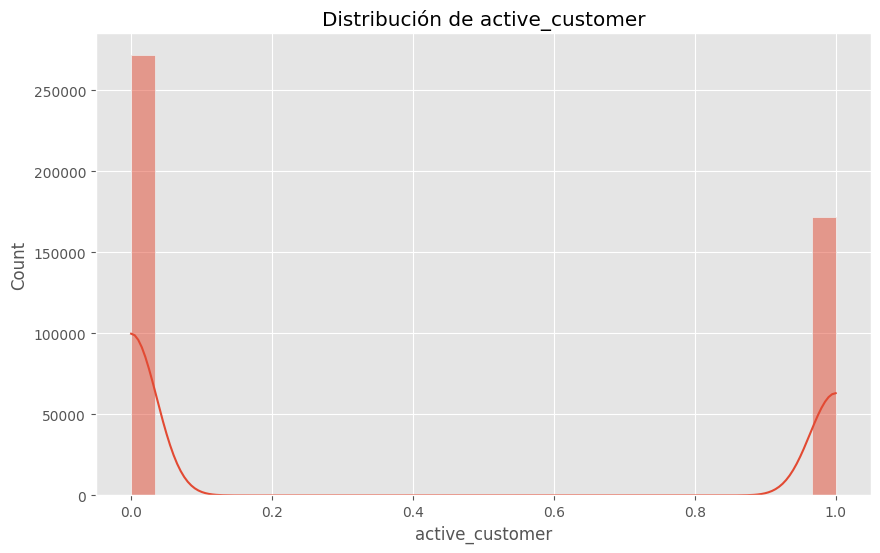

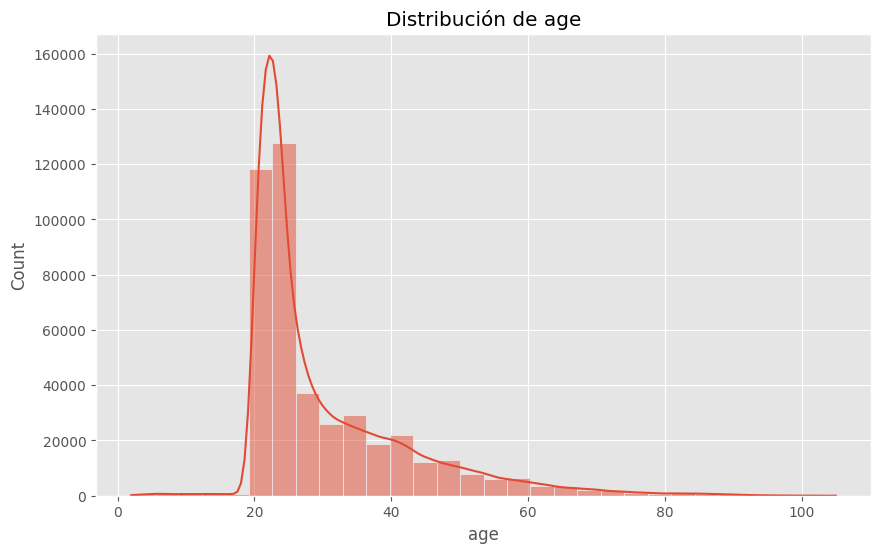

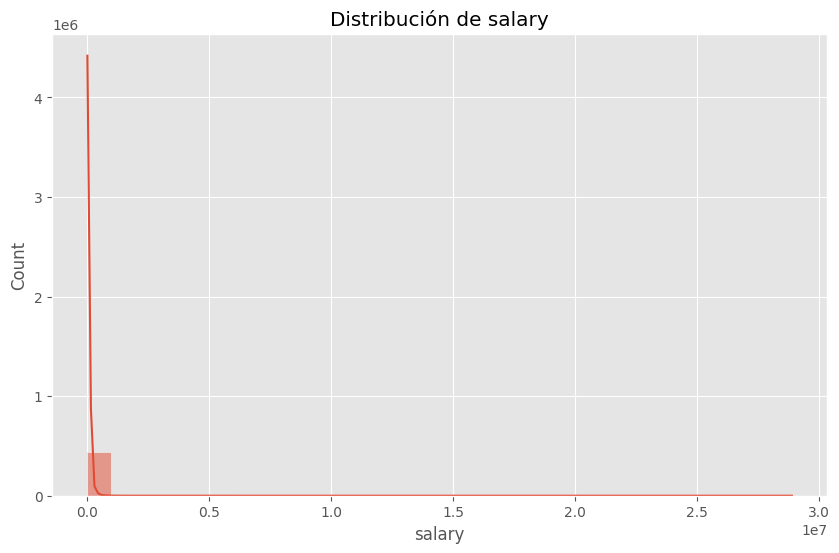

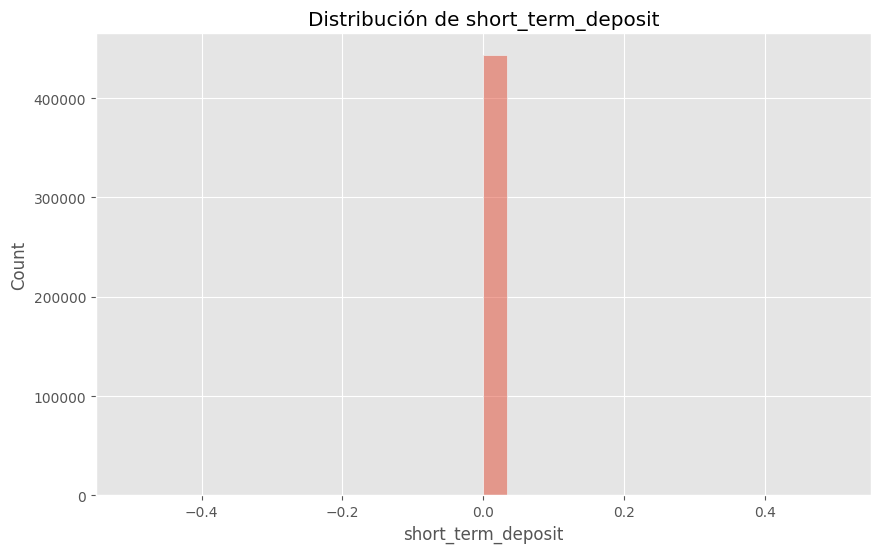

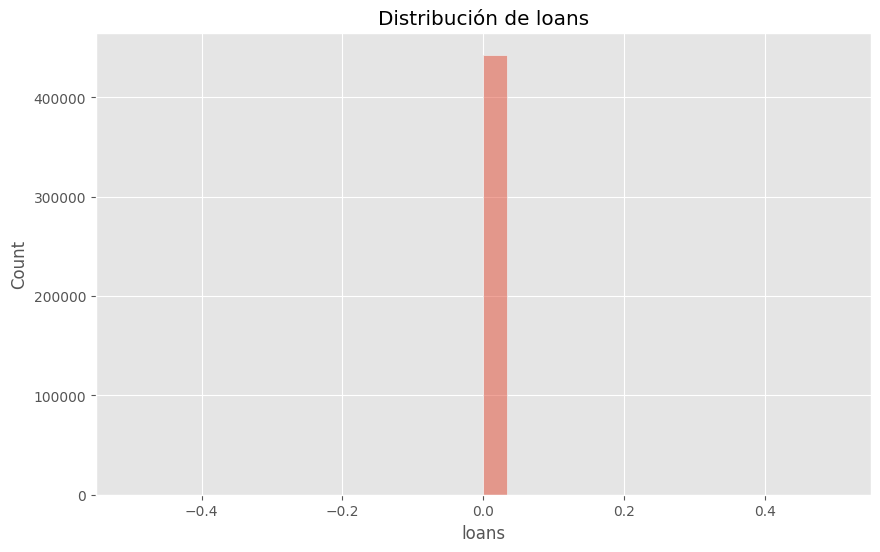

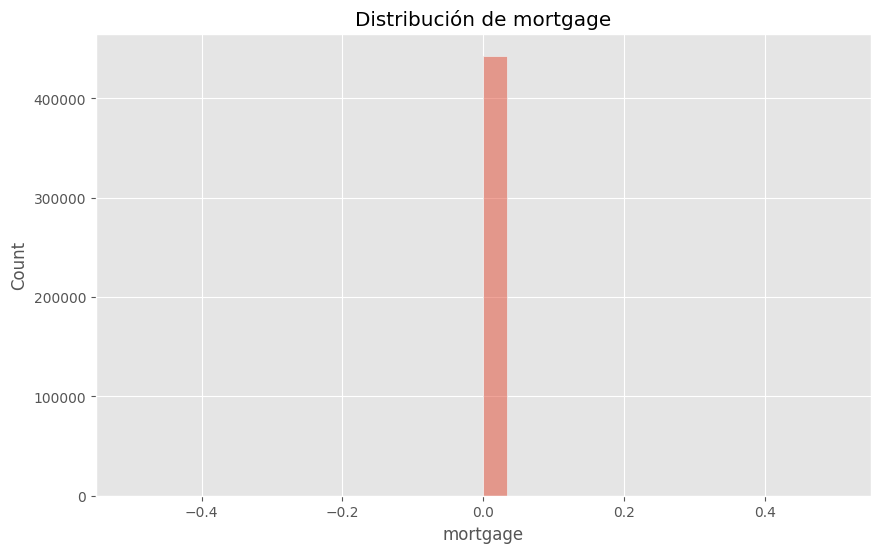

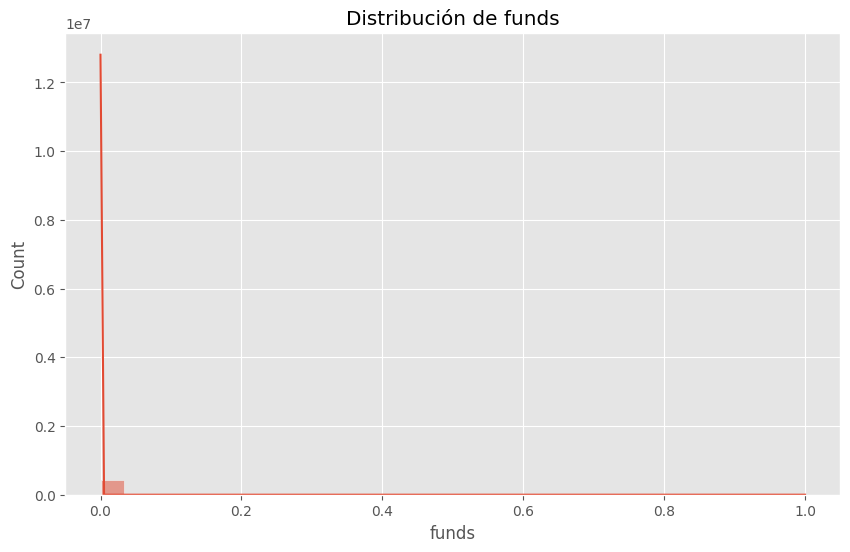

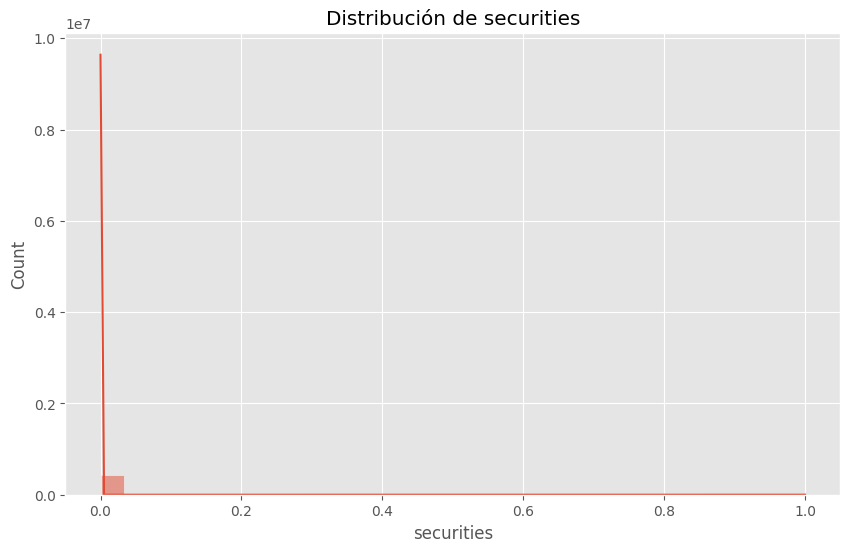

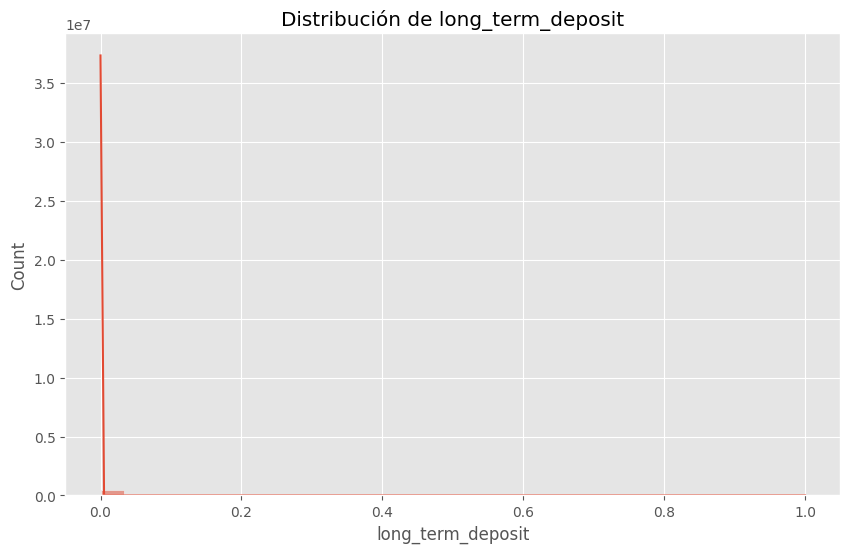

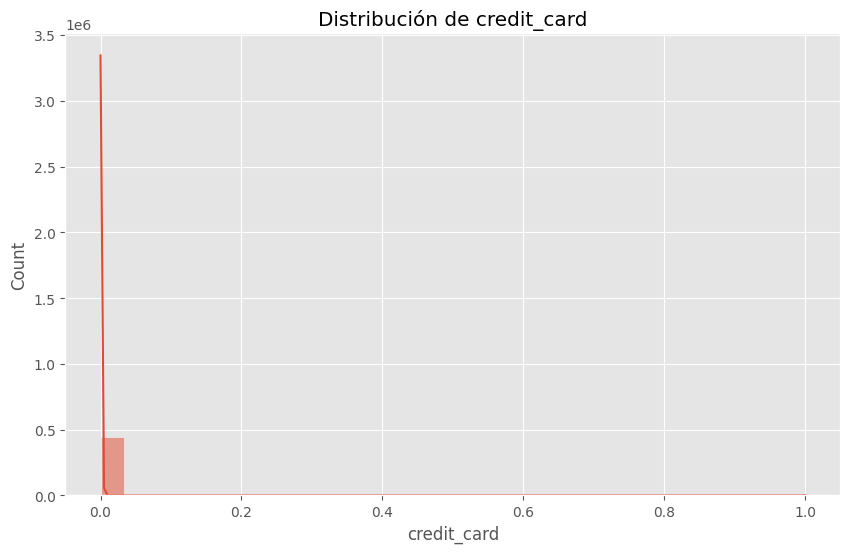

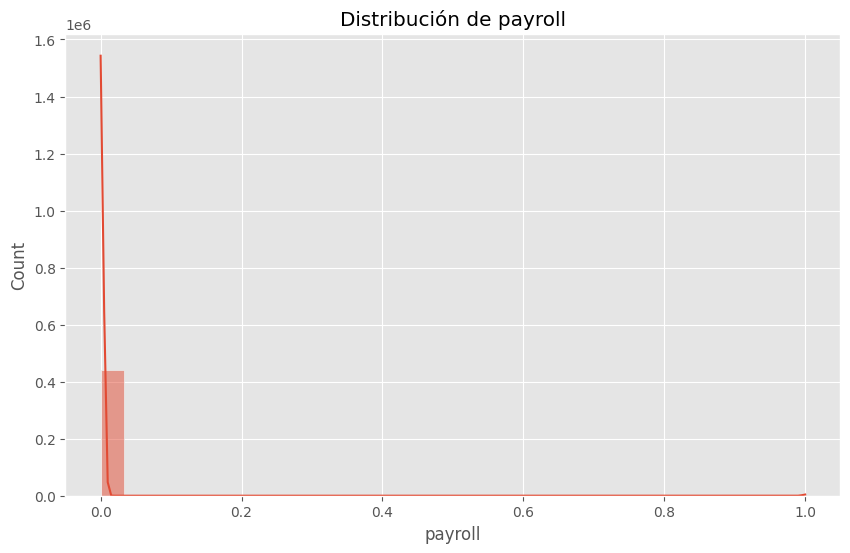

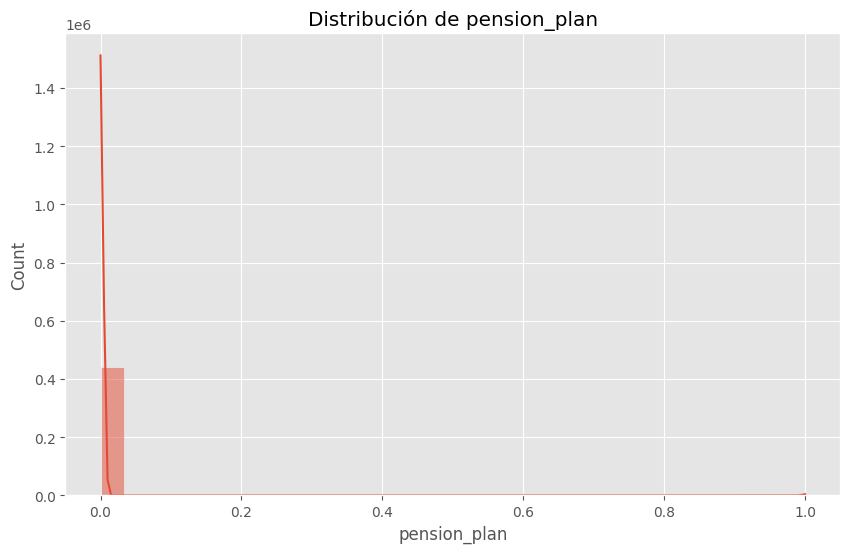

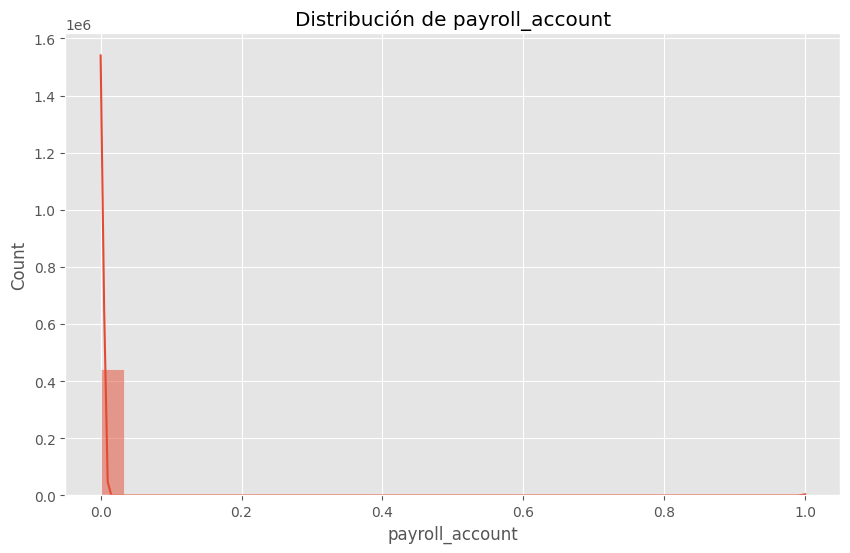

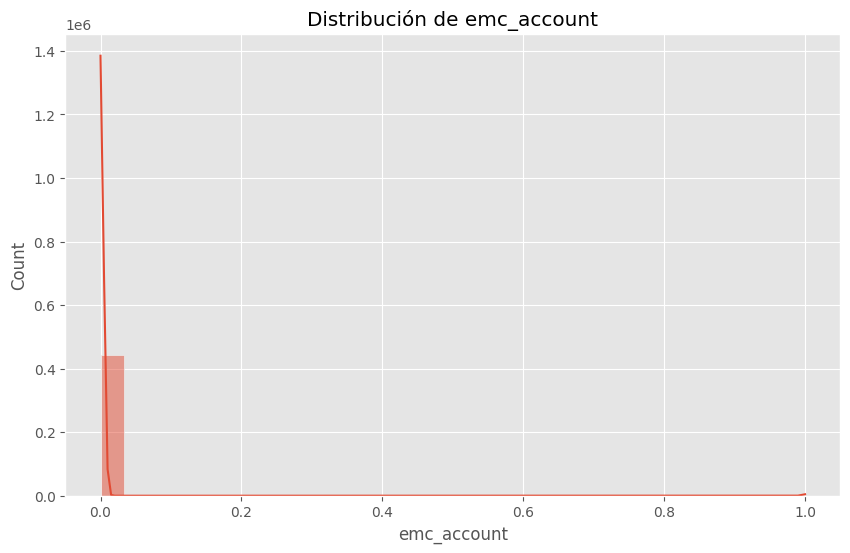

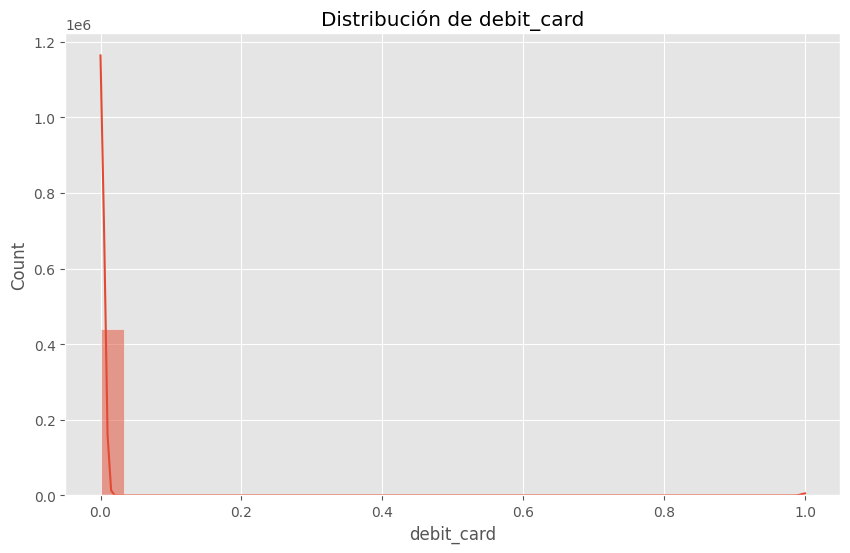

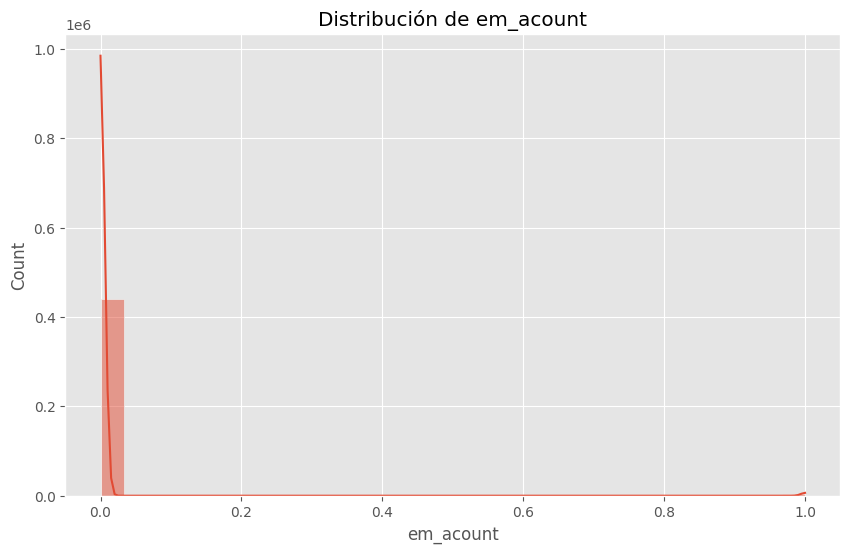

In [94]:
# Generamos histogramas de variables numéricas

for col in lnum_df:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()

# En la mayoría de gráficos al haber muchas variables boolean podemos ver si están más cerca de 0 (no se tiene el producto) o de 1 (producto adquirido).
# En la edad podemos ver que la mayoría se encuentra entre 20 y 30 años.

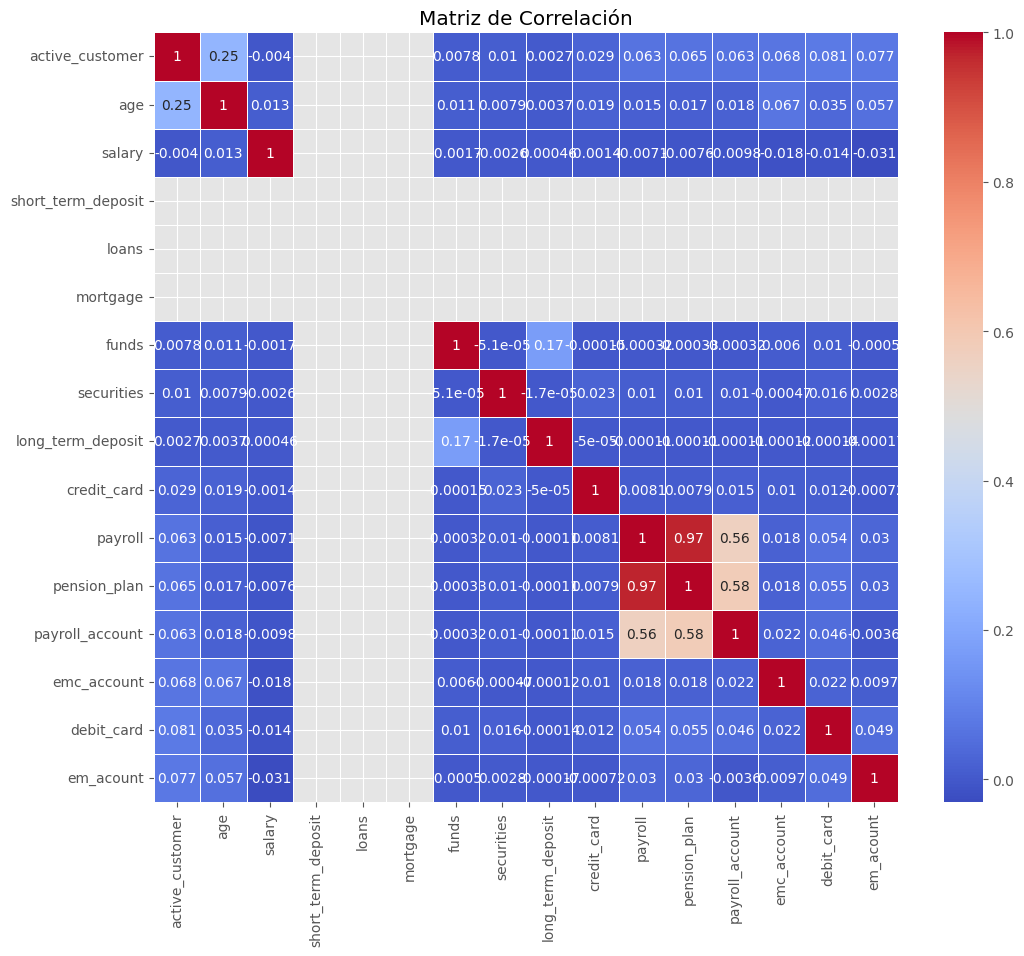

In [95]:
# Mapa de calor de correlaciones

correlation_matrix = df[lnum_df].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Vemos alta correlación entre planes de pensiones y payroll

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442995 entries, 5519868 to 5962862
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pk_cid              442995 non-null  object        
 1   pk_partition        442995 non-null  datetime64[ns]
 2   entry_date          442995 non-null  datetime64[ns]
 3   entry_channel       442995 non-null  object        
 4   active_customer     442995 non-null  float64       
 5   segment             442995 non-null  object        
 6   country_id          442995 non-null  object        
 7   region_code         442995 non-null  object        
 8   gender              442995 non-null  object        
 9   age                 442995 non-null  int64         
 10  salary              442995 non-null  float64       
 11  short_term_deposit  442995 non-null  int64         
 12  loans               442995 non-null  int64         
 13  mortgage            442995 

## Agrupaciones de categorías minoritarias

In [97]:
# Frecuencia igual o menor a 10
def group_by_threshold(df, columns, threshold=10):
    for col in columns:
        col_freq = df[col].value_counts()
        less_freq_values = col_freq[col_freq <= threshold]
        df.loc[df[col].isin(less_freq_values.index.tolist()), col] = "Other"
    return df

# Seleccionamos las columnas que queremos agrupar
columns_to_group = [
    'country_id'
]


# Aplicamos la función
df = group_by_threshold(df, columns_to_group)




In [98]:
# Frecuencia igual o menor a 5000
columns_to_group2 = [
     'region_code'
 ]

df = group_by_threshold(df, columns_to_group2, 5000)

In [99]:
# Frecuencia igual o menor a 10000
columns_to_group3 = [
    'entry_channel'
]

df = group_by_threshold(df, columns_to_group3, 10000)

In [100]:
# Establecemos como índice pk_cid

df.set_index('pk_cid', inplace=True)


In [101]:
# Realizamos One Hot Encoding
columns_for_one_hot=['gender', 'entry_channel', 'segment','region_code', 'country_id']
def OHE(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name, dtype=np.uint8)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    return dataframe.drop(column_name, axis=1)

for i in columns_for_one_hot:
    df = OHE(df, i)


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442995 entries, 657826 to 1550586
Data columns (total 64 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   pk_partition           442995 non-null  datetime64[ns]
 1   entry_date             442995 non-null  datetime64[ns]
 2   active_customer        442995 non-null  float64       
 3   age                    442995 non-null  int64         
 4   salary                 442995 non-null  float64       
 5   short_term_deposit     442995 non-null  int64         
 6   loans                  442995 non-null  int64         
 7   mortgage               442995 non-null  int64         
 8   funds                  442995 non-null  int64         
 9   securities             442995 non-null  int64         
 10  long_term_deposit      442995 non-null  int64         
 11  credit_card            442995 non-null  int64         
 12  payroll                442995 non-null  flo

## DIVISIÓN DEL CONJUNTO DE DATOS Y MODELO DE PROPENSIÓN

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442995 entries, 657826 to 1550586
Data columns (total 64 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   pk_partition           442995 non-null  datetime64[ns]
 1   entry_date             442995 non-null  datetime64[ns]
 2   active_customer        442995 non-null  float64       
 3   age                    442995 non-null  int64         
 4   salary                 442995 non-null  float64       
 5   short_term_deposit     442995 non-null  int64         
 6   loans                  442995 non-null  int64         
 7   mortgage               442995 non-null  int64         
 8   funds                  442995 non-null  int64         
 9   securities             442995 non-null  int64         
 10  long_term_deposit      442995 non-null  int64         
 11  credit_card            442995 non-null  int64         
 12  payroll                442995 non-null  flo

In [104]:
# Lista de productos seleccionados
target_products = ['pension_plan', 'debit_card', 'em_acount', 'payroll']

# Lista de columnas a eliminar
columns_to_drop = ['payroll_account', 'payroll', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'emc_account', 'debit_card', 'em_acount', 'pension_plan']

# Eliminamos las columnas de fecha y no importantes:
X = df.drop(['pk_partition', 'entry_date', 'active_customer'], axis=1)

# Escalado de características
scaler = StandardScaler()
columns_to_scale = ['age', 'salary']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

for product in target_products:
    print(f"Modeling for: {product}")
    
    # Variables predictoras y variable objetivo
    temp_drop_columns = [col for col in columns_to_drop if col != product]
    X_product = X.drop(temp_drop_columns, axis=1).drop(product, axis=1)
    y_product = df[product]

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X_product, y_product, test_size=0.2, random_state=42)

    # Aplicamos SMOTE para el sobremuestreo
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Entrenamos el modelo
    model = LogisticRegression(max_iter=1000)
    model.fit(X_resampled, y_resampled)

    # Predecimos en el conjunto de prueba
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Guardamos las probabilidades predichas en una variable separada para cada producto
    globals()[f'y_pred_prob_{product}'] = y_pred_prob

    # Calculamos AUC
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f'AUC for {product}: {auc:.4f}')
    print('-'*50)

# Visualizamos las primeras filas de las probabilidades predichas para cada producto
for product in target_products:
    print(f"Probabilities for {product}:")
    prob_df = pd.DataFrame(globals()[f'y_pred_prob_{product}'], columns=["Probability"])
    print(prob_df.head())
    print('-'*50)


Modeling for: pension_plan
AUC for pension_plan: 0.7195
--------------------------------------------------
Modeling for: debit_card
AUC for debit_card: 0.7788
--------------------------------------------------
Modeling for: em_acount
AUC for em_acount: 0.9425
--------------------------------------------------
Modeling for: payroll
AUC for payroll: 0.7162
--------------------------------------------------
Probabilities for pension_plan:
   Probability
0     0.229914
1     0.005987
2     0.422674
3     0.348620
4     0.105431
--------------------------------------------------
Probabilities for debit_card:
   Probability
0     0.170603
1     0.045892
2     0.303982
3     0.283418
4     0.128704
--------------------------------------------------
Probabilities for em_acount:
   Probability
0     0.007239
1     0.044448
2     0.043703
3     0.051539
4     0.002490
--------------------------------------------------
Probabilities for payroll:
   Probability
0     0.240374
1     0.005848
2     

In [105]:
y_pred_prob_pension_plan

array([0.22991374, 0.00598738, 0.42267367, ..., 0.12554854, 0.08830737,
       0.39107077])

In [106]:
# Descriptivos de las probabilidades

from sklearn.metrics import confusion_matrix

# Diccionario para almacenar estadísticas descriptivas
stats_dict = {}

# Diccionario para almacenar matrices de confusión
confusion_matrices = {}

# Diccionario para las probabilidades de cada producto
probs_dict = {
    'pension_plan': y_pred_prob_pension_plan,
    'debit_card': y_pred_prob_debit_card,
    'em_acount': y_pred_prob_em_acount,
    'payroll': y_pred_prob_payroll
}

for product in target_products:
    # 1. Estadísticas descriptivas de las probabilidades
    prob_df = pd.DataFrame(probs_dict[product], columns=["Probability"])
    stats_dict[product] = prob_df.describe()
    
    # 2. Matriz de confusión
    y_pred = [1 if prob > 0.5 else 0 for prob in probs_dict[product]]
    confusion_matrices[product] = confusion_matrix(y_test, y_pred)

print(stats_dict)
print(confusion_matrices)


{'pension_plan':         Probability
count  8.859900e+04
mean   2.508021e-01
std    2.053106e-01
min    5.064780e-24
25%    9.814369e-02
50%    2.086534e-01
75%    3.292472e-01
max    9.969862e-01, 'debit_card':         Probability
count  8.859900e+04
mean   2.500189e-01
std    2.163353e-01
min    4.876482e-16
25%    1.239062e-01
50%    1.746257e-01
75%    2.919468e-01
max    9.968414e-01, 'em_acount':         Probability
count  8.859900e+04
mean   1.181143e-01
std    2.214222e-01
min    2.159950e-90
25%    1.020521e-02
50%    2.492439e-02
75%    8.168491e-02
max    9.994263e-01, 'payroll':         Probability
count  8.859900e+04
mean   2.523228e-01
std    2.036305e-01
min    2.999305e-21
25%    1.039108e-01
50%    2.121881e-01
75%    3.312930e-01
max    9.963116e-01}
{'pension_plan': array([[78865,  9484],
       [  150,   100]]), 'debit_card': array([[77854, 10495],
       [  133,   117]]), 'em_acount': array([[79794,  8555],
       [  159,    91]]), 'payroll': array([[78972,  9377],

<Figure size 1000x1200 with 0 Axes>

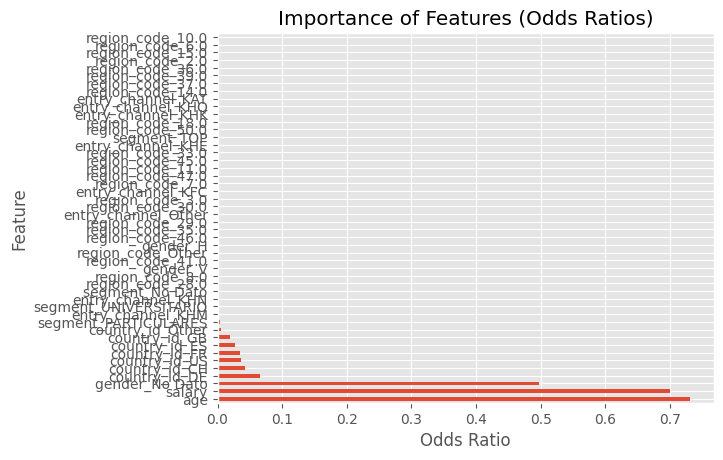

In [107]:
# Calcular las Odds Ratios
odds_ratios = np.exp(model.coef_[0])

# Crear un DataFrame para visualizar
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Odds Ratio': odds_ratios
})

# Ordenar el DataFrame por Odds Ratios
importance_df = importance_df.sort_values(by='Odds Ratio', ascending=False)

# Visualizar la importancia de las características con un gráfico de barras
plt.figure(figsize=(10, 12))
importance_df.set_index('Feature').plot(kind='barh', legend=False)
plt.title('Importance of Features (Odds Ratios)')
plt.ylabel('Feature')
plt.xlabel('Odds Ratio')
plt.show()


<Figure size 1000x1200 with 0 Axes>

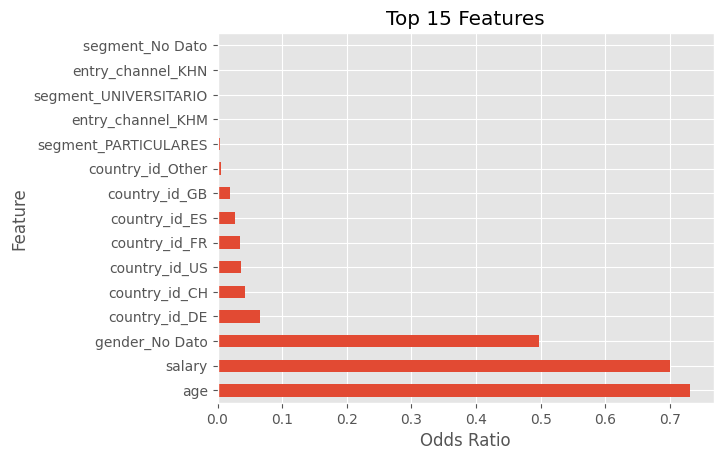

In [108]:
# Selecciona las primeras 20 características
top_15 = importance_df.head(15)

# Visualiza la importancia de las características con un gráfico de barras
plt.figure(figsize=(10, 12))
top_15.set_index('Feature').plot(kind='barh', legend=False)
plt.title('Top 15 Features')
plt.ylabel('Feature')
plt.xlabel('Odds Ratio')
plt.show()


In [109]:
importance_df.head(15)

,Feature,Odds Ratio
0,age,0.730993
1,salary,0.700673
3,gender_No Dato,0.498174
42,country_id_DE,0.066248
41,country_id_CH,0.042801
47,country_id_US,0.035909
44,country_id_FR,0.035039
43,country_id_ES,0.027728
45,country_id_GB,0.018622
46,country_id_Other,0.005718


In [110]:
# Asignamos probabilidades para todo el conjunto de datos

# Lista de productos seleccionados
target_products = ['pension_plan', 'debit_card', 'em_acount', 'payroll']

# Lista de columnas a eliminar
columns_to_drop = ['payroll_account', 'payroll', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'emc_account', 'debit_card', 'em_acount', 'pension_plan']

# Eliminamos las columnas de fecha y no importantes:
X = df.drop(['pk_partition', 'entry_date', 'active_customer'], axis=1)

# Escalado de características
scaler = StandardScaler()
columns_to_scale = ['age', 'salary']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

for product in target_products:
    print(f"Modeling for: {product}")
    
    # Variables predictoras y variable objetivo
    temp_drop_columns = [col for col in columns_to_drop if col != product]
    X_product = X.drop(temp_drop_columns, axis=1).drop(product, axis=1)
    y_product = df[product]

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X_product, y_product, test_size=0.2, random_state=42)

    # Aplicamos SMOTE para el sobremuestreo
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Entrenamos el modelo
    model = LogisticRegression(max_iter=1000)
    model.fit(X_resampled, y_resampled)

    # Predecimos en todo el conjunto de datos
    y_pred_prob_all = model.predict_proba(X_product)[:, 1]
    
    # Añadimos las probabilidades al DataFrame original
    df[f'prob_{product}'] = y_pred_prob_all

print("Probabilities added to the DataFrame!")



Modeling for: pension_plan
Modeling for: debit_card
Modeling for: em_acount
Modeling for: payroll
Probabilities added to the DataFrame!


In [111]:
df.head()

,pk_partition,entry_date,active_customer,age,salary,short_term_deposit,loans,mortgage,funds,securities,...,country_id_DE,country_id_ES,country_id_FR,country_id_GB,country_id_Other,country_id_US,prob_pension_plan,prob_debit_card,prob_em_acount,prob_payroll
pk_cid,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-01,2015-05-01,1.0,44,54493.38,0,0,0,0,0,...,0,1,0,0,0,0,0.365831,0.429454,0.188856,0.347534
657817,2019-05-01,2019-05-01,0.0,32,-1.00,0,0,0,0,0,...,0,1,0,0,0,0,0.435177,0.455523,0.991926,0.440591
657986,2019-05-01,2016-02-01,1.0,39,100993.17,0,0,0,0,0,...,0,1,0,0,0,0,0.372175,0.425004,0.147530,0.374526
657905,2019-05-01,2017-02-01,1.0,85,154059.09,0,0,0,0,0,...,0,1,0,0,0,0,0.008044,0.062068,0.025612,0.007006
657336,2019-05-01,2019-03-01,1.0,38,-1.00,0,0,0,0,0,...,0,1,0,0,0,0,0.368363,0.398236,0.155356,0.364101


In [112]:
# Reseteamos el índice para que pk_cid vuelva a ser una columna
df = df.reset_index()

# Seleccionamos las columnas deseadas
df_probabilities = df[['pk_cid', 'prob_pension_plan', 'prob_debit_card', 'prob_em_acount', 'prob_payroll']]

# Verificamos las primeras filas del nuevo DataFrame
print(df_probabilities.head())


   pk_cid  prob_pension_plan  prob_debit_card  prob_em_acount  prob_payroll
0  657826           0.365831         0.429454        0.188856      0.347534
1  657817           0.435177         0.455523        0.991926      0.440591
2  657986           0.372175         0.425004        0.147530      0.374526
3  657905           0.008044         0.062068        0.025612      0.007006
4  657336           0.368363         0.398236        0.155356      0.364101


In [113]:
# Guardar el DataFrame df_probabilities en un archivo CSV

df_probabilities.to_csv("probabilities.csv", index=False)


In [114]:
df_probabilities.head()

,pk_cid,prob_pension_plan,prob_debit_card,prob_em_acount,prob_payroll
0,657826,0.365831,0.429454,0.188856,0.347534
1,657817,0.435177,0.455523,0.991926,0.440591
2,657986,0.372175,0.425004,0.147530,0.374526
3,657905,0.008044,0.062068,0.025612,0.007006
4,657336,0.368363,0.398236,0.155356,0.364101


In [115]:
pd.set_option('display.max_rows', None)

df.isnull().sum()

pk_cid                   0
pk_partition             0
entry_date               0
active_customer          0
age                      0
salary                   0
short_term_deposit       0
loans                    0
mortgage                 0
funds                    0
securities               0
long_term_deposit        0
credit_card              0
payroll                  0
pension_plan             0
payroll_account          0
emc_account              0
debit_card               0
em_acount                0
gender_H                 0
gender_No Dato           0
gender_V                 0
entry_channel_KAT        0
entry_channel_KFC        0
entry_channel_KHE        0
entry_channel_KHK        0
entry_channel_KHM        0
entry_channel_KHN        0
entry_channel_KHQ        0
entry_channel_Other      0
segment_No Dato          0
segment_PARTICULARES     0
segment_TOP              0
segment_UNIVERSITARIO    0
region_code_10.0         0
region_code_11.0         0
region_code_14.0         0
r

In [116]:
X_test.isnull().sum()

age                      0
salary                   0
gender_H                 0
gender_No Dato           0
gender_V                 0
entry_channel_KAT        0
entry_channel_KFC        0
entry_channel_KHE        0
entry_channel_KHK        0
entry_channel_KHM        0
entry_channel_KHN        0
entry_channel_KHQ        0
entry_channel_Other      0
segment_No Dato          0
segment_PARTICULARES     0
segment_TOP              0
segment_UNIVERSITARIO    0
region_code_10.0         0
region_code_11.0         0
region_code_14.0         0
region_code_15.0         0
region_code_18.0         0
region_code_2.0          0
region_code_28.0         0
region_code_29.0         0
region_code_3.0          0
region_code_30.0         0
region_code_33.0         0
region_code_35.0         0
region_code_36.0         0
region_code_37.0         0
region_code_39.0         0
region_code_41.0         0
region_code_45.0         0
region_code_46.0         0
region_code_47.0         0
region_code_50.0         0
r

In [117]:
# Podemos ver que para em_account sale un AUC de 0.94, lo cual es bastante alto. Por lo que realizamos diferentes comprobaciones en los siguientes apartados para ver data leakage y todo parece correcto.
# Por otra parte hemos visto que es algo fundamental tener una em_account, para poder oeprar en la plataforma, es decir es un producto básico necesario por lo que la mayoría de los clientes lo tienen, por tanto este AUC tiene sentido en este contexto ya que siempre será muy probable tener este prducto.

### VERIFICACIÓN DE DATA LEAKAGE Y CORRELACIONES PARA LA VARIABLE EM_ACCOUNT

In [118]:
# 1. Revisamos la distribución de la variable objetivo

print(df['em_acount'].value_counts(normalize=True))


em_acount
0    0.993548
1    0.006452
Name: proportion, dtype: float64


In [119]:
# 2. Verificamos si hay data leakage

correlations = df.corrwith(df['em_acount']).sort_values(ascending=False)
print(correlations)




/Users/noecrespo/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/noecrespo/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


em_acount                1.000000
segment_No Dato          0.427660
prob_em_acount           0.247604
entry_channel_Other      0.173794
entry_date               0.118659
prob_debit_card          0.114924
pk_cid                   0.101231
active_customer          0.076756
prob_payroll             0.073046
prob_pension_plan        0.070606
age                      0.057350
entry_channel_KHM        0.052372
debit_card               0.049358
entry_channel_KHN        0.032122
payroll                  0.030496
pension_plan             0.030246
region_code_28.0         0.022511
gender_V                 0.012012
emc_account              0.009704
region_code_39.0         0.005664
region_code_3.0          0.004191
region_code_29.0         0.003961
segment_PARTICULARES     0.003704
securities               0.002763
country_id_ES            0.001541
region_code_14.0         0.000842
region_code_18.0         0.000820
segment_TOP             -0.000070
gender_No Dato          -0.000171
long_term_depo

In [120]:
# Vemos las 10 correlaciones top positivas
print("Top 10 positive correlations:")
print(correlations.head(10))

# Vemos las 10 correlaciones top negativas
print("\nTop 10 negative correlations:")
print(correlations.tail(10))


Top 10 positive correlations:
em_acount              1.000000
segment_No Dato        0.427660
prob_em_acount         0.247604
entry_channel_Other    0.173794
entry_date             0.118659
prob_debit_card        0.114924
pk_cid                 0.101231
active_customer        0.076756
prob_payroll           0.073046
prob_pension_plan      0.070606
dtype: float64

Top 10 negative correlations:
entry_channel_KAT       -0.014505
entry_channel_KFC       -0.025435
entry_channel_KHQ       -0.030278
salary                  -0.030852
entry_channel_KHE       -0.069150
segment_UNIVERSITARIO   -0.094181
pk_partition                  NaN
short_term_deposit            NaN
loans                         NaN
mortgage                      NaN
dtype: float64


In [121]:
correlations = df.corrwith(df['em_acount']).sort_values(ascending=False)
print(correlations)


em_acount                1.000000
segment_No Dato          0.427660
prob_em_acount           0.247604
entry_channel_Other      0.173794
entry_date               0.118659
prob_debit_card          0.114924
pk_cid                   0.101231
active_customer          0.076756
prob_payroll             0.073046
prob_pension_plan        0.070606
age                      0.057350
entry_channel_KHM        0.052372
debit_card               0.049358
entry_channel_KHN        0.032122
payroll                  0.030496
pension_plan             0.030246
region_code_28.0         0.022511
gender_V                 0.012012
emc_account              0.009704
region_code_39.0         0.005664
region_code_3.0          0.004191
region_code_29.0         0.003961
segment_PARTICULARES     0.003704
securities               0.002763
country_id_ES            0.001541
region_code_14.0         0.000842
region_code_18.0         0.000820
segment_TOP             -0.000070
gender_No Dato          -0.000171
long_term_depo

In [122]:
print(df['em_acount'].value_counts(normalize=True))


em_acount
0    0.993548
1    0.006452
Name: proportion, dtype: float64


In [123]:
# 5. Evaluamos la importancia de las características
importance = model.coef_[0]
feature_importances = pd.DataFrame({'feature': X_product.columns, 'importance': importance}).sort_values(by='importance', ascending=False)
print(feature_importances)



                  feature  importance
0                     age   -0.313351
1                  salary   -0.355714
3          gender_No Dato   -0.696806
42          country_id_DE   -2.714344
41          country_id_CH   -3.151197
47          country_id_US   -3.326756
44          country_id_FR   -3.351295
43          country_id_ES   -3.585314
45          country_id_GB   -3.983409
46       country_id_Other   -5.164214
14   segment_PARTICULARES   -5.572289
9       entry_channel_KHM   -5.855528
16  segment_UNIVERSITARIO   -5.922405
10      entry_channel_KHN   -6.032110
13        segment_No Dato   -6.077525
23       region_code_28.0   -6.287631
39        region_code_8.0   -6.731045
4                gender_V   -6.844457
32       region_code_41.0   -6.873795
40      region_code_Other   -6.956035
2                gender_H   -7.099407
34       region_code_46.0   -7.363651
28       region_code_35.0   -7.381144
24       region_code_29.0   -7.425350
12    entry_channel_Other   -7.443905
26       reg

## CLUSTERING

In [124]:
column_list = df.columns.tolist()
print(column_list)

['pk_cid', 'pk_partition', 'entry_date', 'active_customer', 'age', 'salary', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_acount', 'gender_H', 'gender_No Dato', 'gender_V', 'entry_channel_KAT', 'entry_channel_KFC', 'entry_channel_KHE', 'entry_channel_KHK', 'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KHQ', 'entry_channel_Other', 'segment_No Dato', 'segment_PARTICULARES', 'segment_TOP', 'segment_UNIVERSITARIO', 'region_code_10.0', 'region_code_11.0', 'region_code_14.0', 'region_code_15.0', 'region_code_18.0', 'region_code_2.0', 'region_code_28.0', 'region_code_29.0', 'region_code_3.0', 'region_code_30.0', 'region_code_33.0', 'region_code_35.0', 'region_code_36.0', 'region_code_37.0', 'region_code_39.0', 'region_code_41.0', 'region_code_45.0', 'region_code_46.0', 'region_code_47.0', 'region_code_50.0', 'region_code_6.0', 'region_code_7.0', 'r

In [125]:
# Creamos una copia de df
df_preprocesado = df.copy()

# Lista de columnas a eliminar
columns_to_drop = ['pk_partition', 'entry_date', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_acount', 'region_code_10.0', 'region_code_11.0', 'region_code_14.0', 'region_code_15.0', 'region_code_18.0', 'region_code_2.0', 'region_code_28.0', 'region_code_29.0', 'region_code_3.0', 'region_code_30.0', 'region_code_33.0', 'region_code_35.0', 'region_code_36.0', 'region_code_37.0', 'region_code_39.0', 'region_code_41.0', 'region_code_45.0', 'region_code_46.0', 'region_code_47.0', 'region_code_50.0', 'region_code_6.0', 'region_code_7.0', 'region_code_8.0', 'region_code_Other', 'country_id_CH', 'country_id_DE', 'country_id_ES', 'country_id_FR', 'country_id_GB', 'country_id_Other', 'country_id_US' , 'gender_H', 'gender_No Dato', 'gender_V']

# Eliminamos las columnas
df_preprocesado.drop(columns=columns_to_drop, inplace=True)

#pk_cid como índice
df_preprocesado.set_index('pk_cid', inplace=True)

# Verificamos las primeras filas del DataFrame modificado
print(df_preprocesado.head())


        active_customer  age     salary  entry_channel_KAT  entry_channel_KFC  \
pk_cid                                                                          
657826              1.0   44   54493.38                  0                  0   
657817              0.0   32      -1.00                  0                  0   
657986              1.0   39  100993.17                  0                  0   
657905              1.0   85  154059.09                  1                  0   
657336              1.0   38      -1.00                  1                  0   

        entry_channel_KHE  entry_channel_KHK  entry_channel_KHM  \
pk_cid                                                            
657826                  0                  0                  0   
657817                  0                  0                  0   
657986                  0                  0                  0   
657905                  0                  0                  0   
657336                  0     

### ESCALADO DE CARACTERÍSTICAS

In [126]:
# Realizamos el escalado de características
# Vamos a escalar solo las variables numéricas, dejando las dummies (variables categóricas tras one-hot encoding) como están.

# Seleccionamos las columnas numéricas para escalar
columns_to_scale = ['age', 'salary']

# Escalamos las características numéricas
scaler = StandardScaler()
df_preprocesado[columns_to_scale] = scaler.fit_transform(df_preprocesado[columns_to_scale])
df_preprocesado = df_preprocesado * 1

df_preprocesado.head()

,active_customer,age,salary,entry_channel_KAT,entry_channel_KFC,entry_channel_KHE,entry_channel_KHK,entry_channel_KHM,entry_channel_KHN,entry_channel_KHQ,entry_channel_Other,segment_No Dato,segment_PARTICULARES,segment_TOP,segment_UNIVERSITARIO,prob_pension_plan,prob_debit_card,prob_em_acount,prob_payroll
pk_cid,,,,,,,,,,,,,,,,,,,
657826,1.0,1.110997,-0.127660,0,0,0,0,0,0,0,1,0,1,0,0,0.365831,0.429454,0.188856,0.347534
657817,0.0,0.130587,-0.434698,0,0,0,0,0,0,0,1,1,0,0,0,0.435177,0.455523,0.991926,0.440591
657986,1.0,0.702493,0.134335,0,0,0,0,0,0,0,1,0,1,0,0,0.372175,0.425004,0.147530,0.374526
657905,1.0,4.460728,0.433325,1,0,0,0,0,0,0,0,0,0,1,0,0.008044,0.062068,0.025612,0.007006
657336,1.0,0.620792,-0.434698,1,0,0,0,0,0,0,0,0,1,0,0,0.368363,0.398236,0.155356,0.364101


### CÁLCULO DEL NÚMERO DE CLUSTERS

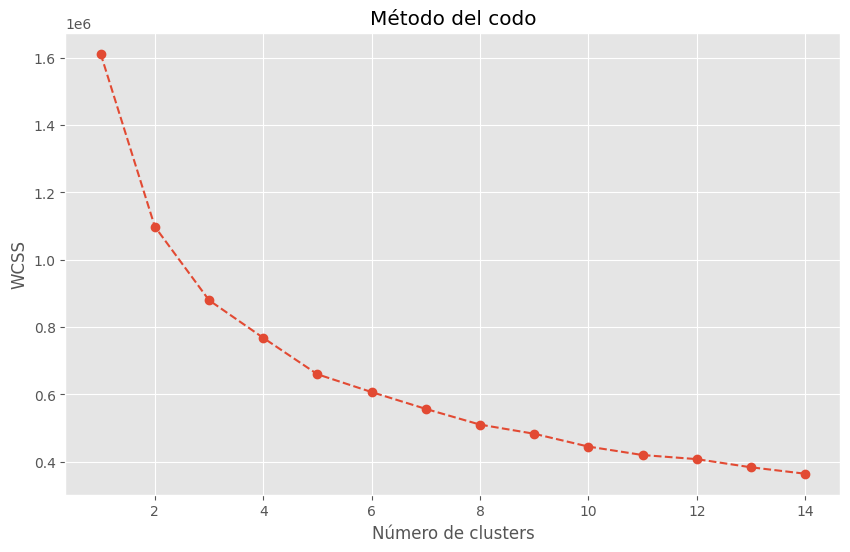

In [127]:
# Calculamos la suma de las distancias al cuadrado para un rango de número de clusters
wcss = []
for i in range(1, 15): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_preprocesado)
    wcss.append(kmeans.inertia_)

# Generamos un gráfico utilizando el método del codo
plt.figure(figsize=(10,6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()



### GENERACIÓN DEL MODELO DE CLUSTERING

In [128]:
# Usamos el número óptimo de clusters identificado en el paso anterior
n_clusters_optimo = 5

kmeans = KMeans(n_clusters=n_clusters_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_preprocesado)


In [129]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df_preprocesado['cluster'] = clusters

# Vemos las estadísticas descriptivas de cada cluster
for cluster_num in range(n_clusters_optimo):
    print(f"Cluster {cluster_num}:\n")
    print(df_preprocesado[df_preprocesado['cluster'] == cluster_num].describe())
    print("-"*40)


Cluster 0:

       active_customer            age         salary  entry_channel_KAT  \
count    186660.000000  186660.000000  186660.000000      186660.000000   
mean          0.231437      -0.504752       0.111888           0.002416   
std           0.421752       0.217130       0.755409           0.049095   
min           0.000000      -2.075334      -0.434698           0.000000   
25%           0.000000      -0.686420      -0.198447           0.000000   
50%           0.000000      -0.523019      -0.008490           0.000000   
75%           0.000000      -0.359617       0.243509           0.000000   
max           1.000000       0.784194      31.975426           1.000000   

       entry_channel_KFC  entry_channel_KHE  entry_channel_KHK  \
count      186660.000000      186660.000000      186660.000000   
mean            0.002105           0.990287           0.001179   
std             0.045837           0.098074           0.034311   
min             0.000000           0.000000     

### COMPROBACIÓN DEL MODELO DE CLUSTERING

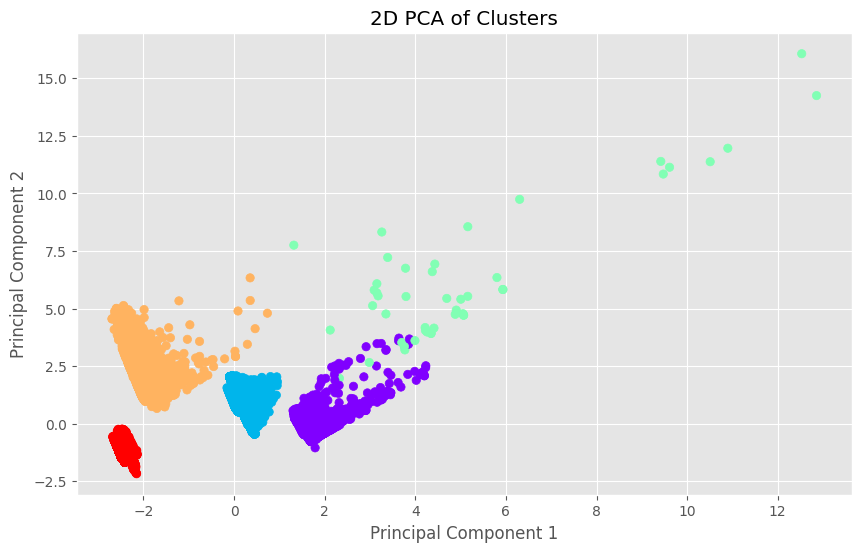

In [130]:
# Visualización usando PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_preprocesado)
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(10,6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['Cluster'], cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Clusters')
plt.show()


In [131]:
# Podemos ver claramente 5 grupos separados, todos ellos están correctamente aislados con el grupo en verde siendo el más disperso y solapando algunos puntos con otro cluster, este es un grupo de 47 individuos con alto salario y edad.

### DESESCALAR LAS VARIABLES ESCALADAS

In [132]:
# Crear una lista para almacenar los dataframes de cada cluster
clusters_dataframes = []

# Separar el dataframe en clusters y agregarlos a la lista
for cluster_num in range(n_clusters_optimo):
    cluster_df = df_preprocesado[df_preprocesado['cluster'] == cluster_num].copy()
    clusters_dataframes.append(cluster_df)


In [133]:
# Inicializamos una lista vacía para almacenar los dataframes desescalados
clusters_desescalados = []

# Desescalamos cada cluster
for cluster_data in clusters_dataframes:
    # Desescalamos las columnas 'age' y 'salary'
    cluster_data[columns_to_scale] = scaler.inverse_transform(cluster_data[columns_to_scale])
    clusters_desescalados.append(cluster_data)

# Muestra el primer cluster como ejemplo
clusters_desescalados[0].head()


,active_customer,age,salary,entry_channel_KAT,entry_channel_KFC,entry_channel_KHE,entry_channel_KHK,entry_channel_KHM,entry_channel_KHN,entry_channel_KHQ,entry_channel_Other,segment_No Dato,segment_PARTICULARES,segment_TOP,segment_UNIVERSITARIO,prob_pension_plan,prob_debit_card,prob_em_acount,prob_payroll,cluster
pk_cid,,,,,,,,,,,,,,,,,,,,
659080,0.0,30.0,72975.81,0,0,1,0,0,0,0,0,0,0,0,1,0.153979,0.129967,0.010226,0.159053,0
673857,0.0,29.0,118523.13,0,0,1,0,0,0,0,0,0,0,0,1,0.033179,0.117723,0.003538,0.035366,0
673327,0.0,30.0,82848.24,0,0,1,0,0,0,0,0,0,0,0,1,0.124098,0.113929,0.008198,0.125645,0
671107,0.0,30.0,93179.04,0,0,1,0,0,0,0,0,0,0,0,1,0.227367,0.174243,0.012409,0.232611,0
667063,1.0,33.0,300036.66,0,0,0,0,0,0,0,1,0,0,0,1,0.368991,0.428333,0.035901,0.372357,0


### CLUSTERS FINALES DESESCALADOS

In [134]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Vemos las estadísticas descriptivas de cada cluster desescalado
for cluster_num, cluster_df in enumerate(clusters_desescalados):
    print(f"Cluster {cluster_num}:\n")
    print(cluster_df.describe())
    print("-"*40)



Cluster 0:

       active_customer            age        salary  entry_channel_KAT  \
count    186660.000000  186660.000000  1.866600e+05      186660.000000   
mean          0.231437      24.223588  9.700913e+04           0.002416   
std           0.421752       2.657621  1.340727e+05           0.049095   
min           0.000000       5.000000 -1.000000e+00           0.000000   
25%           0.000000      22.000000  4.192976e+04           0.000000   
50%           0.000000      24.000000  7.564413e+04           0.000000   
75%           0.000000      26.000000  1.203697e+05           0.000000   
max           1.000000      40.000000  5.752268e+06           1.000000   

       entry_channel_KFC  entry_channel_KHE  entry_channel_KHK  \
count      186660.000000      186660.000000      186660.000000   
mean            0.002105           0.990287           0.001179   
std             0.045837           0.098074           0.034311   
min             0.000000           0.000000           0.0

In [135]:
# Guardamos en .csv los clusters generados

In [136]:
import os

# Obtener el directorio actual
current_directory = os.getcwd()

In [137]:
for i, cluster_data in enumerate(clusters_desescalados):
    cluster_data_reset = cluster_data.reset_index()
    cluster_data_reset.to_csv(f"cluster_{i}.csv", index=False)
